# Wine prediction
### A Knight FinTech internship problem statement

**Introduction**
--
Imagine you are working as a Data Scientist for an Online Wine Shop named “The Wine Land”. As the name suggests, the online store specializes in selling different varieties of wines. The online store receives a decent amount of traffic and reviews from its users. Leverage the “reviews” data and draw actionable insights from it.


**What is Expected?**
--
Build a predictive model for predicting the wine “variety”. Provide the output along with all features to a CSV file. Both Training & test data is provided here
Submit the source code used for building models in a zip or share the link to the GitHub repository.
Also submit a short summary: Model used, features extracted, Model accuracy in train. Along with some visualization of data and top 5 actionable Insights from the Data.
.

**Data Description** 
---
1. user_name - user_name of the reviewer
2. country -The country that the wine is from.
3. review_title - The title of the wine review, which often contains the vintage.
4. review_description - A verbose review of the wine.
5. designation - The vineyard within the winery where the grapes that made the wine are from.
6. points - ratings given by the user. The ratings are between 0 -100.
7. price - The cost for a bottle of the wine
8. province - The province or state that the wine is from.
9. region_1 - The wine-growing area in a province or state (ie Napa).
10. region_2 - Sometimes there are more specific regions specified within a wine-growing area (ie Rutherford inside the Napa Valley), but this value can sometimes be blank.
11. winery - The winery that made the wine
12. variety - The type of grapes used to make the wine. Dependent variable for task 2 of the assignment

**Deadline**
---
9:30 am, 11th May 2020.

## STEP 0: Initialisation and pre-modelling study

Here, we perform the following tasks:
1. import the required libraries
2. import train and test data
3. perform a study on the available data


In [501]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [502]:
#train data is saved in 'raw' dataframe

raw=pd.read_csv("D:\\Office Desk\\Internship\\Knight ML Assignment\\Data\\train.csv")
raw.drop_duplicates(keep="first",inplace=True,ignore_index=True) 
raw.info()
raw.head(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77641 entries, 0 to 77640
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_name           59105 non-null  object 
 1   country             77608 non-null  object 
 2   review_title        77641 non-null  object 
 3   review_description  77641 non-null  object 
 4   designation         55458 non-null  object 
 5   points              77641 non-null  int64  
 6   price               72356 non-null  float64
 7   province            77608 non-null  object 
 8   region_1            65680 non-null  object 
 9   region_2            33814 non-null  object 
 10  winery              77641 non-null  object 
 11  variety             77641 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 7.1+ MB


,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec
5,@wineschach,Argentina,Andean 2005 Finca La Escondida Reserva Caberne...,"Strident aromas of licorice, herbs, berries an...",Finca La Escondida Reserva,85,13.0,Other,San Juan,NaN,Andean,Cabernet Sauvignon
6,@wawinereport,US,Gordon Estate 2012 Tradition Red (Columbia Val...,"Half Syrah and half Cabernet Sauvignon, with 4...",Tradition,91,45.0,Washington,Columbia Valley (WA),Columbia Valley,Gordon Estate,Red Blend
7,@vboone,US,Rock Wall 2014 Monte Rosso Reserve Zinfandel (...,"High-toned red fruit stars in this wine, a nic...",Monte Rosso Reserve,90,50.0,California,Sonoma County,Sonoma,Rock Wall,Zinfandel
8,@paulgwine,US,Elizabeth Chambers 2014 Falcon Glen Vineyard P...,"Displaying typical McMinnville AVA subtlety, t...",Falcon Glen Vineyard,91,48.0,Oregon,McMinnville,Willamette Valley,Elizabeth Chambers,Pinot Noir
9,@kerinokeefe,Italy,Mannucci Droandi 2009 Ceppeto Riserva (Chiant...,This blend of Sangiovese and 10% Merlot opens ...,Ceppeto Riserva,86,31.0,Tuscany,Chianti Classico,NaN,Mannucci Droandi,Red Blend


In [503]:
raw.isnull().sum()

user_name             18536
country                  33
review_title              0
review_description        0
designation           22183
points                    0
price                  5285
province                 33
region_1              11961
region_2              43827
winery                    0
variety                   0
dtype: int64

## FEATURE EXTRACTION
### review_title

We can use review_title to predict the variety of wine used. The words used in the review_title can be used to predict the variety using this method.

##  Preprocess Review_title

1. Remove punctuations, replace '-' with ' '
2. convert all cases to lowercase.
3. Add all unique words to a dictionary
4. Convert each review_title into a numpy tensor

In [504]:
df_raw=raw.loc[:,['review_title','variety']]
c=0
for review in df_raw['review_title']:
    new=""
    for i in review:
        if(i==' ' or i.isalpha()):
            new=new+i.lower()
        else:
            if(i=='-'):
                new=new+' '
        
    df_raw['review_title'][c]=new
    c+=1
    
c=0
for variety in df_raw['variety']:
    new=""
    for i in variety:
        if(i==' ' or i.isalnum()):
            new=new+i.lower()
        else:
            if(i=='-'):
                new=new+' '
        
    df_raw['variety'][c]=new
    c+=1
df_raw.head(100)


,review_title,variety
0,andrew peace peace family vineyard chardonnay...,chardonnay
1,north by northwest red columbia valley wa,red blend
2,renato ratti conca barolo,nebbiolo
3,domaine lancienne cure labbaye white bergerac...,bordeaux style white blend
4,château du cèdre le cèdre vintage malbec vin ...,malbec
...,...,...
95,el capricho reserve cabernet sauvignon,cabernet sauvignon
96,pahlmeyer pinot noir sonoma coast,pinot noir
97,ramey annum cabernet sauvignon napa valley,cabernet sauvignon
98,tenuta monteti caburnio red toscana,red blend


In [505]:
#make unique word arrays:
raw_dict={}
for variety in df_raw['variety']:
    words=variety.split()
    for word in words:
        if(word in raw_dict.keys()):
            ;
        else:
            raw_dict[word]=0
        
'''
WHY DO WE DO THIS??
We do this so that if in case the review contains the name of the variety itseld, then the system will find it easy to learn 
faster. Also, we are only adding the words in each variety to the dictonary, with each of its value being zero. The value increases
only if the word occurs in any of review_title.

WHY A DICTIONARY?
Our aim is to create an input tensor for each review title which says the presence(1) or absence(0) of the most frequently used words.
For this, we need to create a dictionary with all the words and the number of occurences of each word throughout the review_title column.
Then, we convert each review_title into an input tensor of our wish.
'''
#print(raw_dict)
for review in df_raw['review_title']:
    words=review.split()
    for word in words:
        if(word in raw_dict.keys()):
            raw_dict[word]+=1
        else:
            raw_dict[word]=1
print('dictionary length: ',len(raw_dict))

dictionary length:  26793


**NOTE**
---
As it can be seen, there are 34305 unique words used in the review_title column. Creating an input tensor of length 34305 would be difficult as the learning rate will be slow. Hence, we only take those unique words into consideration that occur more than once.

In [507]:
import collections
sort=sorted(raw_dict.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)  
sort_dict ={}
sort_dict= collections.OrderedDict(sort)
print("dictionary sorted with frequency: \n",sort_dict)

prefinal_dict={}
for key in sort_dict.keys():
    if(sort_dict[key]>1):
        prefinal_dict[key]=sort_dict[key]

        
sort=sorted(prefinal_dict.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)  
dictionary ={}
dictionary = collections.OrderedDict(sort)

i=1
revdict={}
for word in dictionary.keys():
    dictionary[word]=i
    revdict[i]=word
    i+=1
    
print('final rank based dict: ',dictionary)


dictionary sorted with frequency: 
 OrderedDict([('valley', 19675), ('red', 10917), ('pinot', 10737), ('sauvignon', 10552), ('de', 9135), ('noir', 8862), ('vineyard', 8522), ('cabernet', 8287), ('chardonnay', 7154), ('château', 5528), ('blanc', 4340), ('estate', 4192), ('riesling', 3921), ('rosé', 3817), ('wa', 3516), ('reserve', 3449), ('napa', 3415), ('santa', 3282), ('la', 3256), ('domaine', 3242), ('syrah', 3151), ('columbia', 3056), ('county', 2913), ('sonoma', 2825), ('white', 2737), ('river', 2599), ('di', 2555), ('hills', 2395), ('merlot', 2392), ('nv', 2380), ('brut', 2358), ('russian', 2262), ('reserva', 2191), ('zinfandel', 2116), ('malbec', 2057), ('coast', 1964), ('california', 1833), ('vineyards', 1817), ('bordeaux', 1788), ('côtes', 1753), ('cru', 1716), ('walla', 1648), ('sparkling', 1647), ('les', 1604), ('mendoza', 1518), ('cuvée', 1511), ('creek', 1502), ('willamette', 1485), ('saint', 1470), ('du', 1378), ('cellars', 1375), ('dry', 1360), ('del', 1359), ('alsace', 1

**DICTIONARY RESULT**
--
It is very clear that all words in the resulting dictionary are present in both train and test datasets. The dictionary contains all unique words along with a distinct number, from 0 to 17519, where 0 denotes the most used word, while 17519 denotes the least used word. The length of the dictionary is 17510. 


In [508]:
class_dict={}
rev_class_dict={}
i=0
for variety in df_raw['variety'].unique():
    class_dict[variety]=i
    i+=1
df_raw.replace({'variety':class_dict},inplace=True)
i=0
for variety in raw['variety'].unique():
    rev_class_dict[i]=variety
    i+=1
print('class dictionary: \n',class_dict,'\nrev-class dictionary: \n',rev_class_dict)
df_raw.head(20)

class dictionary: 
 {'chardonnay': 0, 'red blend': 1, 'nebbiolo': 2, 'bordeaux style white blend': 3, 'malbec': 4, 'cabernet sauvignon': 5, 'zinfandel': 6, 'pinot noir': 7, 'sauvignon blanc': 8, 'gamay': 9, 'grüner veltliner': 10, 'bordeaux style red blend': 11, 'sangiovese': 12, 'syrah': 13, 'white blend': 14, 'cabernet franc': 15, 'portuguese red': 16, 'portuguese white': 17, 'rhône style red blend': 18, 'rosé': 19, 'champagne blend': 20, 'merlot': 21, 'riesling': 22, 'sparkling blend': 23, 'pinot grigio': 24, 'tempranillo': 25, 'pinot gris': 26, 'gewürztraminer': 27} 
rev-class dictionary: 
 {0: 'Chardonnay', 1: 'Red Blend', 2: 'Nebbiolo', 3: 'Bordeaux-style White Blend', 4: 'Malbec', 5: 'Cabernet Sauvignon', 6: 'Zinfandel', 7: 'Pinot Noir', 8: 'Sauvignon Blanc', 9: 'Gamay', 10: 'Grüner Veltliner', 11: 'Bordeaux-style Red Blend', 12: 'Sangiovese', 13: 'Syrah', 14: 'White Blend', 15: 'Cabernet Franc', 16: 'Portuguese Red', 17: 'Portuguese White', 18: 'Rhône-style Red Blend', 19: 'Ros

,review_title,variety
0,andrew peace peace family vineyard chardonnay...,0
1,north by northwest red columbia valley wa,1
2,renato ratti conca barolo,2
3,domaine lancienne cure labbaye white bergerac...,3
4,château du cèdre le cèdre vintage malbec vin ...,4
5,andean finca la escondida reserva cabernet sa...,5
6,gordon estate tradition red columbia valley wa,1
7,rock wall monte rosso reserve zinfandel sonom...,6
8,elizabeth chambers falcon glen vineyard pinot...,7
9,mannucci droandi ceppeto riserva chianti cla...,1


In [509]:
x_tensor2=[]
for review in df_raw['review_title']:
    arr=list()
    
    for word in review.split():
        if(word not in dictionary.keys()):
            ;
        else:
            arr.append(dictionary[word]+1)
        
    x_tensor2.append(arr)


def tensor2_to_review(tensor):
    review=""
    for i in tensor:
        if i==0:
            ;
        else:
            review+=(" "+revdict[i-1])
    return review


In [510]:

x_train2,x_test2,y_train2,y_test2=train_test_split(x_tensor2,y_tensor)
#preprocessing:

from keras.preprocessing import sequence
max_len=20
x_train2 = sequence.pad_sequences(x_train2, maxlen=max_len)
x_test2 = sequence.pad_sequences(x_test2, maxlen=max_len)

print('train data shape: ',x_train2.shape)
print('train labels shape: ',x_test2.shape)
print('validation data shape: ',y_train2.shape)
print('validation labels shape: ',y_test2.shape)

train data shape:  (58230, 20)
train labels shape:  (19411, 20)
validation data shape:  (58230, 28)
validation labels shape:  (19411, 28)


**END OF STEP 0**
--
   The input and output tensors are ready to be fed to the to-be-built model. Dictionaries and reverse dictionaries are prepared. Data is normalised, preprocessed and is now ready to be fed. Train and test tensors are successfully split in a 80-20 ratio. We may now proceed to building the model.

# STEP 1: Model Building



## PROPOSED MODEL:
### MODEL v7
#### CNN Model

Using A 3 layered CNN with window size 3 for the 1D text tensor, we tend to create a CNN model.

In [513]:
from keras import models
from keras import layers
modelv7=models.Sequential()

modelv7.add(layers.Embedding(17512, 16, input_length=20))
modelv7.add(layers.Conv1D(16,3, activation='relu'))
modelv7.add(layers.MaxPooling1D(3))
modelv7.add(layers.Conv1D(32, 3, activation='relu'))
modelv7.add(layers.GlobalMaxPooling1D())

modelv7.add(layers.Dense(28, activation='sigmoid'))
modelv7.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 20, 16)            280192    
_________________________________________________________________
conv1d_46 (Conv1D)           (None, 18, 16)            784       
_________________________________________________________________
max_pooling1d_22 (MaxPooling (None, 6, 16)             0         
_________________________________________________________________
conv1d_47 (Conv1D)           (None, 4, 32)             1568      
_________________________________________________________________
global_max_pooling1d_13 (Glo (None, 32)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 28)                924       
Total params: 283,468
Trainable params: 283,468
Non-trainable params: 0
_______________________________________________

In [528]:
from keras import optimizers
from keras import metrics
modelv7.compile(optimizer=optimizers.RMSprop(),
    loss='categorical_crossentropy',
    metrics=['accuracy',metrics.Recall(),metrics.Precision()])
historyv7 = modelv7.fit(x_train2, y_train2,
    epochs=20,
    batch_size=512,
    validation_data=(x_test2,y_test2))
modelv7.save('D:\\Office Desk\\Internship\\Knight ML Assignment\\v7o9.h5')

C:\Users\R. Senthil Kumar\anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 58230 samples, validate on 19411 samples
Epoch 1/20
58230/58230 [==============================] - 3s 58us/step - loss: 0.0220 - accuracy: 0.9909 - recall_18: 0.0751 - precision_18: 0.9772 - val_loss: 0.2002 - val_accuracy: 0.9530 - val_recall_18: 0.0613 - val_precision_18: 0.9589
Epoch 2/20
58230/58230 [==============================] - 3s 53us/step - loss: 0.0213 - accuracy: 0.9912 - recall_18: 0.0687 - precision_18: 0.9761 - val_loss: 0.2016 - val_accuracy: 0.9529 - val_recall_18: 0.0647 - val_precision_18: 0.9602
Epoch 3/20
58230/58230 [==============================] - 3s 51us/step - loss: 0.0214 - accuracy: 0.9911 - recall_18: 0.0787 - precision_18: 0.9782 - val_loss: 0.2035 - val_accuracy: 0.9526 - val_recall_18: 0.0623 - val_precision_18: 0.9633
Epoch 4/20
58230/58230 [==============================] - 3s 51us/step - loss: 0.0210 - accuracy: 0.9914 - recall_18: 0.0716 - precision_18: 0.9786 - val_loss: 0.2034 - val_accuracy: 0.9544 - val_recall_18: 0.0752 - val_precisi

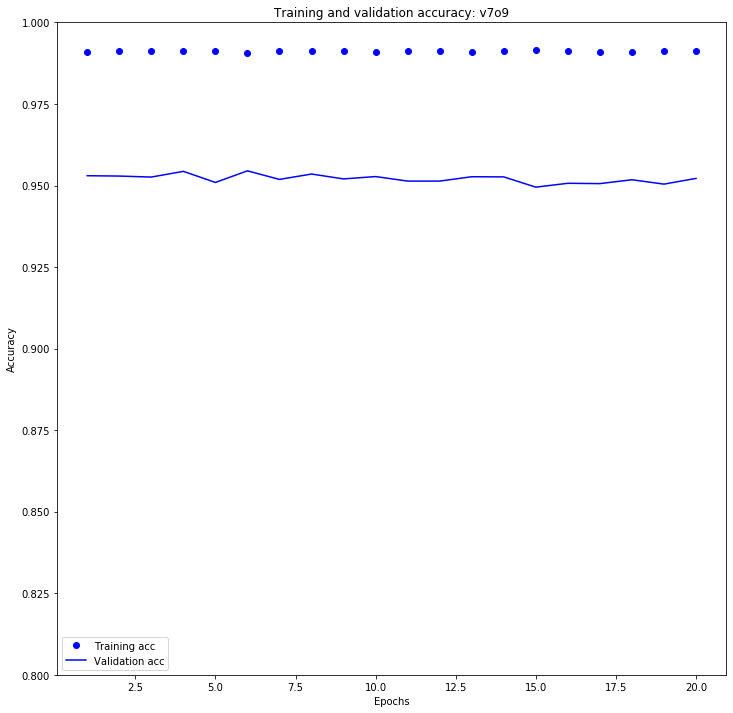

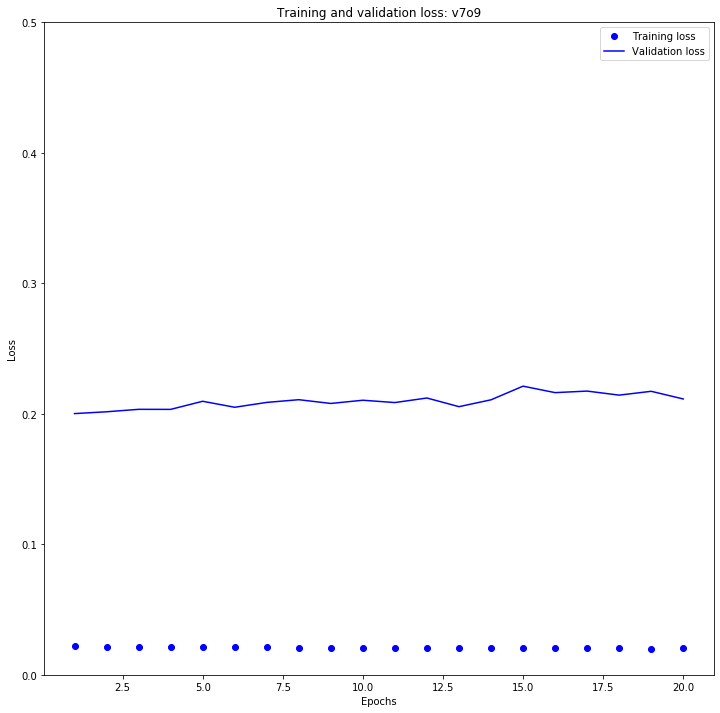

In [529]:
acc = historyv7.history['accuracy']
val_acc = historyv7.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.figure(figsize=(12,12))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy: v7o9')
plt.ylim(0.8,1.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('D:\\Office Desk\\Internship\\Knight ML Assignment\\v7o9_acc.jpeg')

plt.show()

loss = historyv7.history['loss']
val_loss = historyv7.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.figure(figsize=(12,12))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss: v7o9')
plt.ylim(0,0.5)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('D:\\Office Desk\\Internship\\Knight ML Assignment\\v7o9_loss.jpeg')

plt.show()

## STEP 2: EVALUATION OF PERFORMANCE OF MODEL
Model is evaluated using the accuracy metric. Each model runs throughout the Train dataset, and the number of faulty predictions are recorded.

In [530]:
x_temp = sequence.pad_sequences(x_tensor2, maxlen=20)

review_title=[]
realcol=[]
#m1col=[]
#m2col=[]
m7col=[]

allcount=0
#m1fault=0
#m2fault=0
m7fault=0

for i in range(0,len(x_tensor)):
    #ret=model.predict(x_tensor[i:i+1])
    #ret2=modelv2.predict(x_tensor[i:i+1])
    ret7=modelv7.predict(x_temp[i:i+1])
    
    #Y1=(np.where(ret[0]==max(ret[0])))[0][0]
    #Y2=(np.where(ret2[0]==max(ret2[0])))[0][0]
    Y7=(np.where(ret7[0]==max(ret7[0])))[0][0]
    
    real=tensor_to_variety(y_tensor[i])
    #Y1=rev_class_dict[Y1]
    #Y2=rev_class_dict[Y2]
    Y7=rev_class_dict[Y7]

    if(Y7==real ):#and Y2==real and Y6==real):
        allcount+=1
    else:
        review_title.append(raw['review_title'][i])
        realcol.append(real)        
        #m1col.append(Y1)
        #m2col.append(Y2)
        m7col.append(Y7)
        #if(Y1!=real):
            #m1fault+=1
        #if(Y2!=real):
            #m2fault+=1
        if(Y7!=real):
            m7fault+=1
    
'''
    print('real val: ',tensor_to_variety(y_tensor[i]))
    print('m1 prediction: ',rev_class_dict[Y1])
    print('m2 prediction: ',rev_class_dict[Y2])
    print('m6 prediction: ',rev_class_dict[Y6])
'''

#worker is a pandas dataframe that only contains faulty predictions
         
worker=pd.DataFrame(columns=['review_title','real','m7'])
worker['review_title']=review_title
worker['real']=realcol
#worker['m1']=m1col
#worker['m2']=m2col
worker['m7']=m7col


worker.head()
print(allcount,m7fault)


'''

acc = historyv7.history['accuracy'].index(max(historyv7.history['accuracy']))
vacc = historyv7.history['val_accuracy'].index(max(historyv7.history['val_accuracy']))

loss = historyv7.history['loss'].index(min(historyv7.history['loss']))
vloss = historyv7.history['val_loss'].index(min(historyv7.history['val_loss']))
print(acc,vacc,loss,vloss)


print(max(history.history['accuracy']),max(historyv2.history['accuracy']),max(historyv7.history['accuracy']))
print(max(history.history['val_accuracy']),max(historyv2.history['val_accuracy']),max(historyv7.history['val_accuracy']))
print(min(history.history['val_loss']),min(historyv2.history['val_loss']),min(historyv7.history['val_loss']))
'''

76252 1389


"\n\nacc = historyv7.history['accuracy'].index(max(historyv7.history['accuracy']))\nvacc = historyv7.history['val_accuracy'].index(max(historyv7.history['val_accuracy']))\n\nloss = historyv7.history['loss'].index(min(historyv7.history['loss']))\nvloss = historyv7.history['val_loss'].index(min(historyv7.history['val_loss']))\nprint(acc,vacc,loss,vloss)\n\n\nprint(max(history.history['accuracy']),max(historyv2.history['accuracy']),max(historyv7.history['accuracy']))\nprint(max(history.history['val_accuracy']),max(historyv2.history['val_accuracy']),max(historyv7.history['val_accuracy']))\nprint(min(history.history['val_loss']),min(historyv2.history['val_loss']),min(historyv7.history['val_loss']))\n"

# FINAL STEP: PREDICTION
The following on the test data are fed to the model mv7 (CNN-dense model) and the following are performed here. 
1. Preprocessing, 
2. Model feeding
3. CSV writing 

In [471]:
test_raw=pd.read_csv('D:\\Office Desk\\Internship\\Knight ML Assignment\\data\\test.csv')
df_test=test_raw.loc[:,['review_title']]
c=0
for review in df_test['review_title']:
    new=""
    for i in review:
        if(i==' ' or i.isalpha()):
            new=new+i.lower()
        else:
            if(i=='-'):
                new=new+' '
        
    df_test['review_title'][c]=new
    c+=1
    
df_test.head(100)


,review_title
0,boedecker cellars athena pinot noir willamett...
1,mendoza vineyards gran reserva by richard bon...
2,prime chardonnay coombsville
3,bodega cuarto dominio chento vineyard selecti...
4,sassodisole brunello di montalcino
...,...
95,armstrong family four birds red columbia vall...
96,domaine de ledre carrément rouge red côtes du...
97,cave de turckheim nv mayerling brut rosé spark...
98,cedarville vineyard estate cabernet sauvignon...


In [472]:
xtfinal=[]
for review in df_test['review_title']:
    arr=list()
    
    for word in review.split():
        if(word not in dictionary.keys()):
            ;
        else:
            arr.append(dictionary[word]+1)
        
    xtfinal.append(arr)


def tensor2_to_review(tensor):
    review=""
    for i in tensor:
        if i==0:
            ;
        else:
            review+=(" "+revdict[i-1])
    return review

max_len=20
xtfinal = sequence.pad_sequences(xtfinal, maxlen=max_len)
xtfinal.shape

(20665, 20)

In [497]:
output=[]
for i in range(0,len(xtfinal)):
    ret7=modelv7.predict(xtfinal[i:i+1])
    Y7=(np.where(ret7[0]==max(ret7[0])))[0][0]
    output.append(rev_class_dict[Y7])

test_raw['variety']=output
test_raw.head(20)


test_raw.to_csv('D:\\Office Desk\\Internship\\Knight ML Assignment\\Data\\answer.csv')
print('Task completed')
#Task completed

Task completed


# DATA VISUALISATION

The following cells deal with data visualisation, and obtaining of actionable insights from these charts

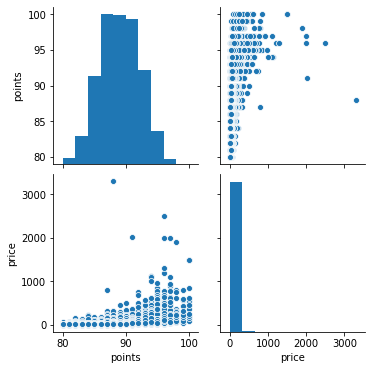

In [520]:
vis=raw
import seaborn as sb
sb.pairplot(raw)

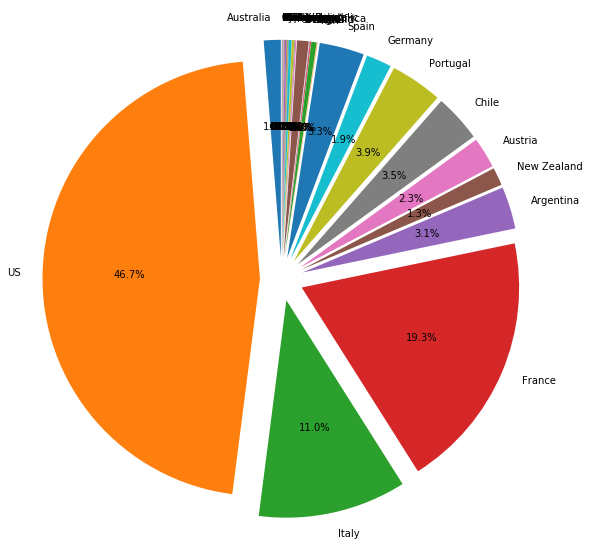

In [521]:
#visualisation 1: countrywise distribution
country_dict={}
for country in vis['country']:
    if country not in country_dict.keys():
        country_dict[country]=1
    else:
        country_dict[country]+=1

plt.figure(figsize=(10,10))
explode=[]
for i in range(0,len(country_dict.values())):
    explode.append(0.1)
plt.pie(country_dict.values(),
        
        labels=country_dict.keys(),
        
        startangle=90,
        shadow= False,
        explode=explode,
        autopct='%1.1f%%')

plt.savefig('D:\\Office Desk\\Internship\\Knight ML Assignment\\country.jpeg')
plt.show()



**GRAPH INFERENCE**

---
This Graph shows us that people from USA, Italy, France are among the top 3 purchasers for "The Wine Land". These 3 cuntries alone share 75%+ of the buying potential. Expanding branches into countries like USA and France can help the company expand its business.

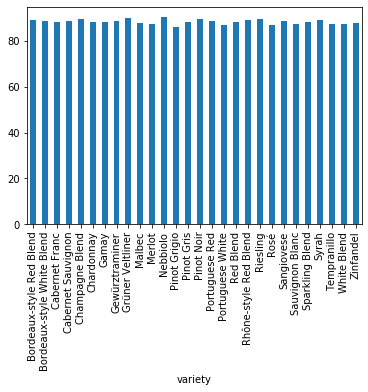

In [522]:
data=raw
(data.groupby(data['variety'])['points'].mean()).plot.bar()

**GRAPH INFERENCE**

---
This Graph shows us that Pinot noir, Chardonnay and Merlot have high mean point value. 

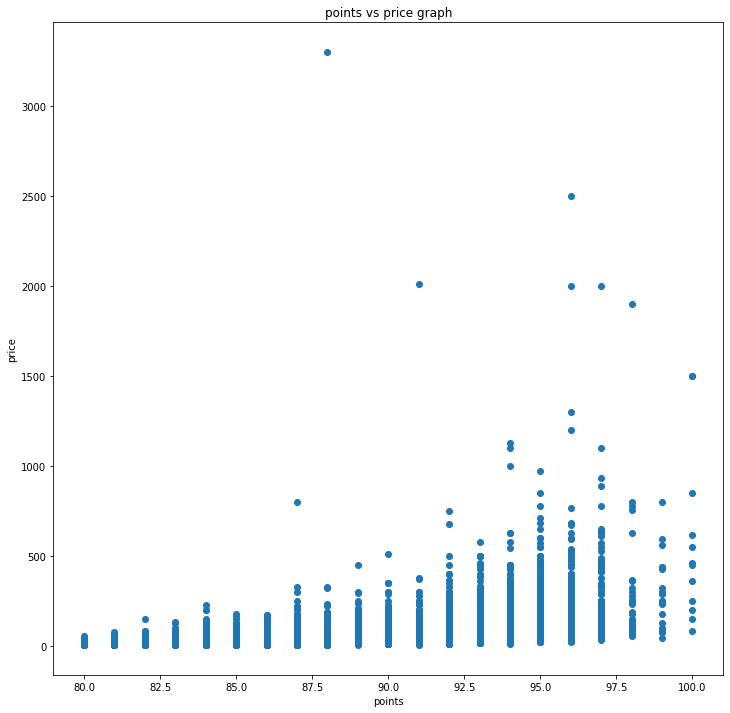

In [523]:
vis=raw

plt.figure(figsize=(12,12))
plt.scatter(vis['points'],vis['price'])
plt.xlabel('points')
plt.ylabel('price')
plt.title('points vs price graph')
plt.savefig('D:\\Office Desk\\Internship\\Knight ML Assignment\\pvp.jpeg')
plt.show()

**GRAPH INFERENCE**

---
This Graph shows us that there is no disctinct relationship between the points and price. Although, it is very clear that irrespective of the price, the points range between 80 and 100, but a clear notion cannot be derived

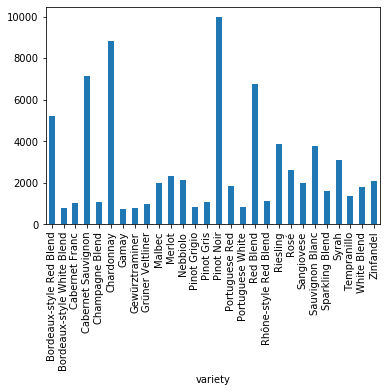

In [524]:
(data['variety'].groupby(data['variety']).agg('count')).plot.bar()

**GRAPH INFERENCE**

---
This Graph shows us that Pinot noir, Chardonnay and Red Blend are the most preferred wine varieties. 

In [525]:
data2=raw
data2=(data['winery'].groupby(data['winery']).agg('count'))
data2.head()
data2.sort_values(ascending=False).head(20)

winery
Testarossa                    165
Louis Latour                  164
Williams Selyem               161
Georges Duboeuf               155
Chateau Ste. Michelle         146
Wines & Winemakers            138
DFJ Vinhos                    122
Concha y Toro                 107
Columbia Crest                106
Gary Farrell                   95
Siduri                         94
Lynmar                         93
Kendall-Jackson                92
Albert Bichot                  89
Jean-Luc and Paul Aegerter     84
Martin Ray                     82
Chanson Père et Fils           82
Montes                         80
Louis Jadot                    80
Iron Horse                     79
Name: winery, dtype: int64

62504


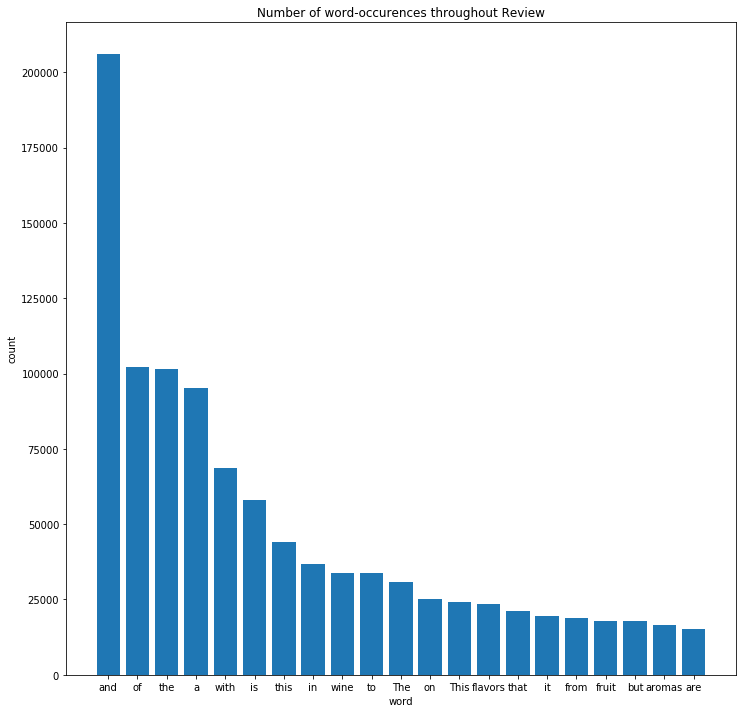

In [526]:
#most used words in review
#make unique word arrays:
reviewdict={}
for review in data['review_description']:
    words=review.split()
    for word in words:
        if(word in reviewdict.keys()):
            reviewdict[word]+=1
        else:
            reviewdict[word]=1
print(len(reviewdict))
sort=sorted(reviewdict.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)  
reviewsort ={}
reviewsort = collections.OrderedDict(sort)

i=0
na=[]
va=[]
for word in reviewsort.keys():
    na.append(word)
    va.append(reviewsort[word])
    i+=1
    if(i>20):
        break
centers = range(len(na))
plt.figure(figsize=(12,12))
plt.xlabel('word')
plt.ylabel('count')
plt.title('Number of word-occurences throughout Review')
plt.bar(centers, va, align='center', tick_label=na)
plt.savefig('D:\\Office Desk\\Internship\\Knight ML Assignment\\wordvscount.jpeg')
plt.show()

**GRAPH INFERENCE**

---
This Graph shows us that "and", "of" and "the", and other words like prepositions and articles (ie, which are not associated with wine variety) occurs most frequently in review_description column.

29405


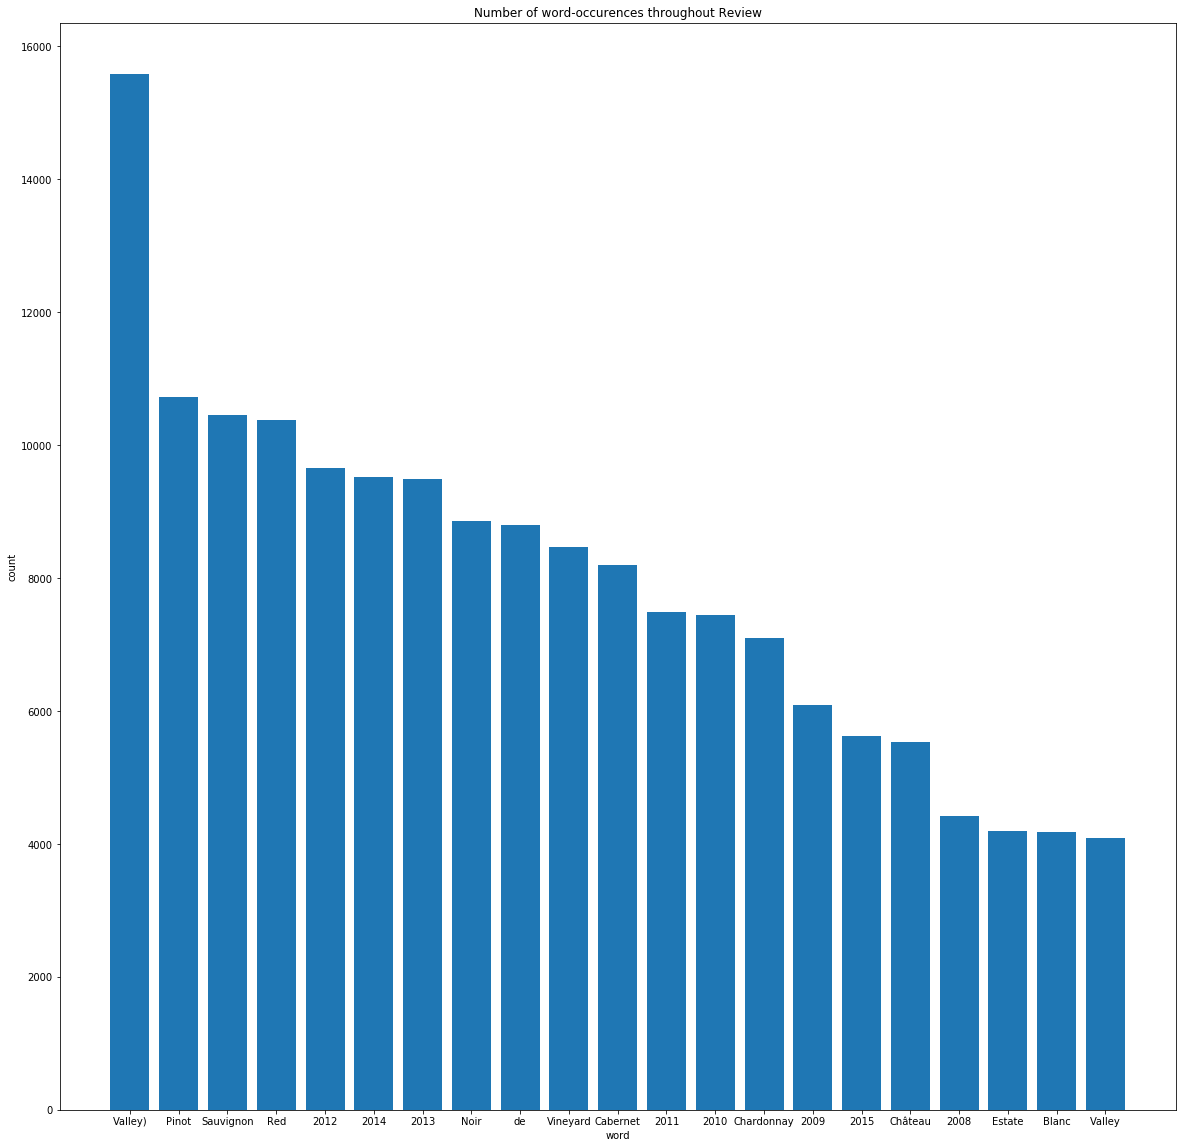

In [527]:
#most used words in review
#make unique word arrays:
reviewdict={}
for review in data['review_title']:
    words=review.split()
    for word in words:
        if(word in reviewdict.keys()):
            reviewdict[word]+=1
        else:
            reviewdict[word]=1
print(len(reviewdict))
sort=sorted(reviewdict.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)  
reviewsort ={}
reviewsort = collections.OrderedDict(sort)

i=0
na=[]
va=[]
for word in reviewsort.keys():
    na.append(word)
    va.append(reviewsort[word])
    i+=1
    if(i>20):
        break
centers = range(len(na))
plt.figure(figsize=(20,20))
plt.xlabel('word')
plt.ylabel('count')
plt.title('Number of word-occurences throughout Review')
plt.bar(centers, va, align='center', tick_label=na)
plt.savefig('D:\\Office Desk\\Internship\\Knight ML Assignment\\wordvscount2.jpeg')
plt.show()

**GRAPH INFERENCE**

---
This Graph shows us that "Valley", "Pinot" and "Sauvigon", and other words directly associated with wine variety occurs most frequently in review_title column.

In [500]:
#"Working for A Brighter Tomorrow!"

### Written by kodooraKILLER
---
Open Sourced at github.com/kodooraKILLER. For queries, mail iam.rsk@outlook.com



